# Image Classification with Convolutional Neural Networks (CNN)

In this project, we will build a CNN to classify images from the CIFAR-10 dataset. The dataset contains 60,000 32x32 color images across 10 classes (airplane, car, bird, etc.).

**Goals:**
- Learn CNN architecture and its key components (convolutional layers, pooling layers, and fully connected layers).
- Preprocess images (normalization, augmentation).
- Train and evaluate the CNN model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import logging
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# CIFAR-10 class labels
cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Load and Data Preprocessing

2024-10-21 10:39:50,654 - INFO - Loading CIFAR-10 dataset...
2024-10-21 10:39:52,676 - INFO - Dataset loaded successfully.
2024-10-21 10:39:52,677 - INFO - Normalizing the data...
2024-10-21 10:39:53,654 - INFO - Converting labels to categorical...
2024-10-21 10:39:53,659 - INFO - Data preprocessing completed successfully.
2024-10-21 10:39:53,661 - INFO - Training data shape: (50000, 32, 32, 3)
2024-10-21 10:39:53,662 - INFO - Testing data shape: (10000, 32, 32, 3)


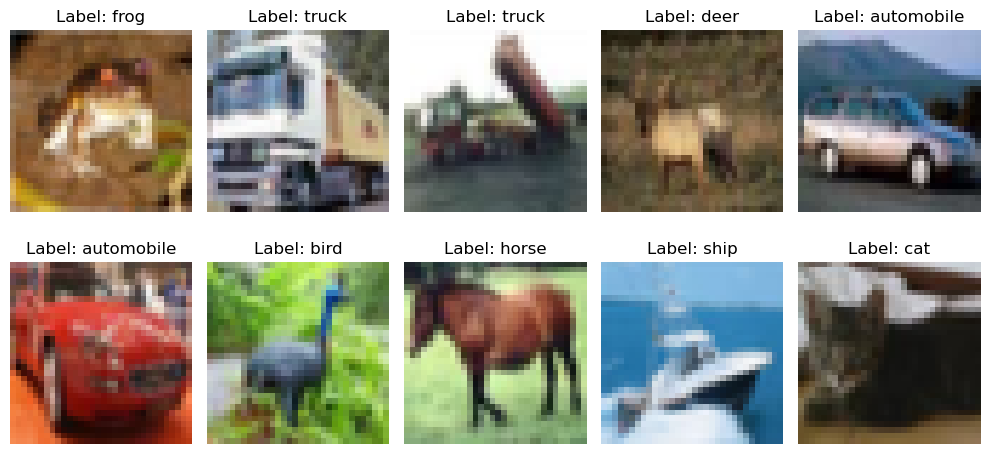

In [2]:


def load_and_preprocess_data():
    """Load and preprocess the CIFAR-10 dataset."""
    try:
        logging.info("Loading CIFAR-10 dataset...")
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
        logging.info("Dataset loaded successfully.")
        
        # Normalize the pixel values
        logging.info("Normalizing the data...")
        x_train = x_train / 255.0
        x_test = x_test / 255.0
        
        # Convert labels to categorical (one-hot encoding)
        logging.info("Converting labels to categorical...")
        y_train_cat = to_categorical(y_train, num_classes=10)
        y_test_cat = to_categorical(y_test, num_classes=10)
        
        logging.info("Data preprocessing completed successfully.")
        return (x_train, y_train, y_train_cat), (x_test, y_test, y_test_cat)
    except Exception as e:
        logging.error(f"Error in loading and preprocessing data: {e}")
        raise


def plot_sample_images(images, labels, num_images=10):
    """Plot sample images with their corresponding labels."""
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {cifar_labels[labels[i][0]]}")  # Display the predicted label
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    

# Load the data
(x_train, y_train, y_train_cat), (x_test, y_test, y_test_cat) = load_and_preprocess_data()

# Dataset dimensions
logging.info(f"Training data shape: {x_train.shape}")
logging.info(f"Testing data shape: {x_test.shape}")

# Plot sample images from the training dataset
plot_sample_images(x_train, y_train, num_images=10)

# Build the CNN Model

In [3]:


def create_cnn_model(input_shape, num_classes):
    """Creates a CNN model."""
    try:
        logging.info("Creating CNN model...")
        model = Sequential()
        model.add(Input(shape=input_shape))

        # First Convolutional Block
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))

        # Second Convolutional Block
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))

        # Third Convolutional Block
        model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))

        # Flatten and Fully Connected Layers
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.3))

        # Output Layer
        model.add(Dense(num_classes, activation='softmax'))

        logging.info("CNN model created successfully.")
        return model
    except Exception as e:
        logging.error(f"Error in creating CNN model: {e}")
        raise

# Create the model
input_shape = (32, 32, 3)
num_classes = 10
model = create_cnn_model(input_shape, num_classes)
model.summary()

    

2024-10-21 10:39:55,941 - INFO - Creating CNN model...
2024-10-21 10:39:56,932 - INFO - CNN model created successfully.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

# Compile and Train the Model

In [4]:


def compile_and_train_model(model, x_train, y_train_cat, x_test, y_test_cat):
    """Compile and train the CNN model."""
    try:
        # Compile the model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        # Early Stopping
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

        logging.info("Training the model...")
        history = model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=20, batch_size=32, callbacks=[early_stopping])
        logging.info("Model training completed successfully.")
        return history
    except Exception as e:
        logging.error(f"Error in training the model: {e}")
        raise

# Compile and train the model
history = compile_and_train_model(model, x_train, y_train_cat, x_test, y_test_cat)


2024-10-21 10:39:57,105 - INFO - Training the model...


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 227s 135ms/step - accuracy: 0.3479 - loss: 1.8358 - val_accuracy: 0.5369 - val_loss: 1.3144
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 204s 130ms/step - accuracy: 0.5957 - loss: 1.1437 - val_accuracy: 0.6883 - val_loss: 0.8950
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 214s 137ms/step - accuracy: 0.6695 - loss: 0.9470 - val_accuracy: 0.6633 - val_loss: 0.9898
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 206s 132ms/step - accuracy: 0.7250 - loss: 0.8130 - val_accuracy: 0.7357 - val_loss: 0.7686
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 210s 134ms/step - accuracy: 0.7541 - loss: 0.7214 - val_accuracy: 0.7824 - val_loss: 0.6488
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 214s 137ms/step - accuracy: 0.7687 - loss: 0.6738 - val_accuracy: 0.7517 - val_loss: 0.7442
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 250s 129ms/step - accuracy: 0.7904 - loss: 0.6094 - val_accuracy: 0.7827 - val_loss: 0.6656
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 195s 125ms/step - ac

2024-10-21 11:53:44,501 - INFO - Model training completed successfully.


# Evaluate the Model

In [5]:


def evaluate_model(model, x_test, y_test_cat):
    """Evaluate the model on the test set."""
    try:
        logging.info("Evaluating the model...")
        test_loss, test_accuracy = model.evaluate(x_test, y_test_cat, verbose=2)
        logging.info(f'Test accuracy: {test_accuracy:.4f}')
    except Exception as e:
        logging.error(f"Error in evaluating the model: {e}")
        raise

# Evaluate the model
evaluate_model(model, x_test, y_test_cat)


2024-10-21 11:53:44,536 - INFO - Evaluating the model...


313/313 - 8s - 26ms/step - accuracy: 0.8463 - loss: 0.4890


2024-10-21 11:53:53,331 - INFO - Test accuracy: 0.8463


# Visualize Results

2024-10-21 11:53:53,359 - INFO - Visualizing results...


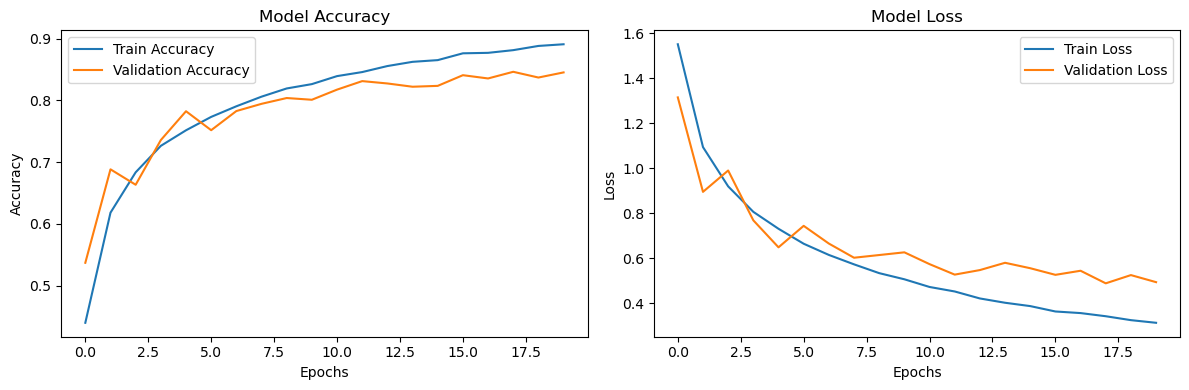

2024-10-21 11:53:54,217 - INFO - Results visualization completed.


In [6]:
def visualize_results(history):
    """Visualize training and validation results."""
    try:
        logging.info("Visualizing results...")
        plt.figure(figsize=(12, 4))

        # Accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()
        logging.info("Results visualization completed.")
    except Exception as e:
        logging.error(f"Error in visualizing results: {e}")
        raise

# Visualize results
visualize_results(history)

